In [1]:
import os
os.chdir('/content/drive/MyDrive/class_home/week 2')

import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

from helper2 import *

try:
    os.makedirs('ATS_data2')
except:
    pass



FileNotFoundError: ignored

In [ ]:
#!unzip ATS_data2.zip -d ./ATS_data2

In [ ]:
def Radius(fit):
    df = 2*fit[0]*900 + fit[1]
    ddf = 2*fit[0]

    R = (1+(df)**2)**1.5/(ddf)

    return R

def Write(string, img, line=1):
    img = img.copy()
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    position = (10,40 + 50*line)
    fontScale              = 2
    fontColor              = (255,255,255)
    lineType               = 2

    cv2.putText(img, string, 
        position, 
        font, 
        fontScale,
        fontColor,
        lineType)
    return img


In [ ]:
datas = FindLane('ATS_data2', range(400,600, 10), show=True)

  0%|          | 0/20 [00:00<?, ?it/s]


FileNotFoundError: ignored

In [ ]:
#datas = FindLane('ATS_data2', range(1419))
#laneDf = pd.DataFrame(datas, columns = ['curvatL', 'curvatR', 'deviation'])
#laneDf.to_csv('lane.csv', index=False)

  0%|          | 0/1419 [00:00<?, ?it/s]/content/drive/MyDrive/week 2/helper2.py:105: RuntimeWarning: invalid value encountered in double_scalars
  if (scale_max - scale_mean)/scale_mean > t:
/content/drive/MyDrive/week 2/helper2.py:105: RuntimeWarning: divide by zero encountered in double_scalars
  if (scale_max - scale_mean)/scale_mean > t:
  3%|▎         | 47/1419 [00:13<06:43,  3.40it/s]

KeyboardInterrupt: ignored

In [ ]:
laneDf = pd.read_csv('lane.csv')

In [ ]:
logDf = pd.read_csv('drive_log.csv')

In [ ]:
laneDf

,curvatL,curvatR,deviation
0,0.077409,0.639403,1.106621
1,0.077409,0.639712,1.106399
2,0.586744,0.638824,1.111323
3,0.728179,0.689194,1.122301
4,0.728400,0.791800,1.129610
...,...,...,...
1414,-4.605213,1.462823,-1.152580
1415,0.511447,0.182435,-1.011523
1416,5.426596,2.984077,-0.872738
1417,2.468239,6.047167,1.342742


In [ ]:
logDf

,steer,speed,throttle,brake
0,0.000000,-0.010015,0.000000,1.0
1,0.000000,-0.005614,0.000000,1.0
2,0.000000,-0.001974,0.000000,1.0
3,-0.003015,62.744854,1.000000,0.0
4,0.001918,87.873055,1.000000,0.0
...,...,...,...,...
1414,-0.010717,56.001244,1.000000,0.0
1415,0.000026,84.230990,0.786713,0.0
1416,0.000022,84.243690,0.859255,0.0
1417,0.000019,84.322556,0.704246,0.0


In [ ]:
df = pd.concat([logDf, laneDf], axis=1)
df.head()

,steer,speed,throttle,brake,curvatL,curvatR,deviation
0,0.000000,-0.010015,0.0,1.0,0.077409,0.639403,1.106621
1,0.000000,-0.005614,0.0,1.0,0.077409,0.639712,1.106399
2,0.000000,-0.001974,0.0,1.0,0.586744,0.638824,1.111323
3,-0.003015,62.744854,1.0,0.0,0.728179,0.689194,1.122301
4,0.001918,87.873055,1.0,0.0,0.728400,0.791800,1.129610


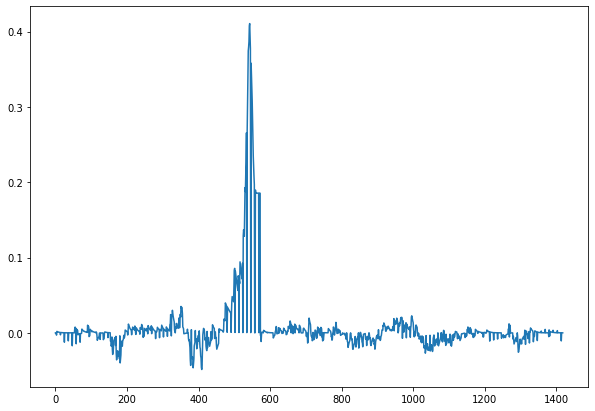

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df.steer)

In [ ]:
def Smooth(array, size=5):
    mini = 0
    maxi = len(array)-1

    new_array = np.zeros(maxi+1)
    for i in range(maxi+1):
        new_array[i] = np.mean(array[max(i-size, mini):min(i+size, maxi)])

    return new_array


0.00776895841540552
0.03825086457367151


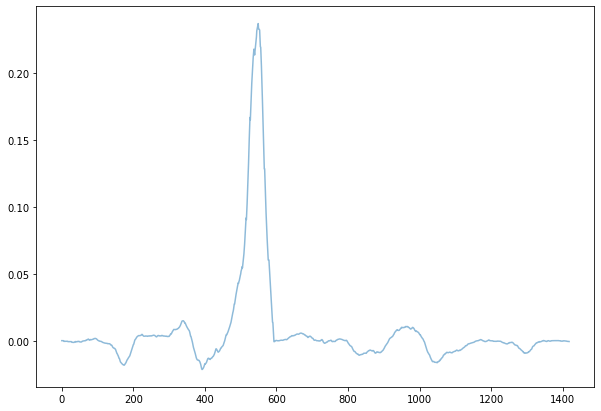

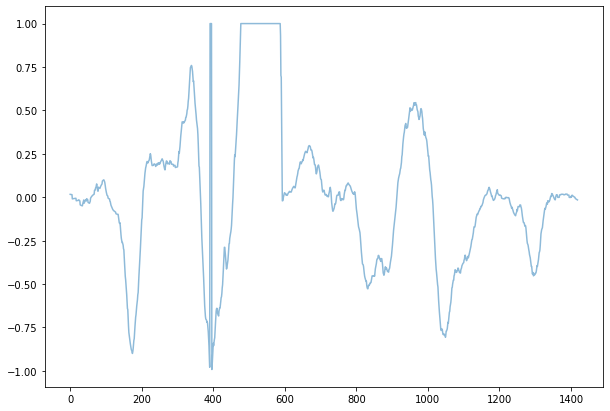

In [ ]:
smoothSteer = Smooth(df.steer, size=20)
print(smoothSteer.mean())
print(smoothSteer.std())
plt.figure(figsize=(10,7))
plt.plot(smoothSteer, alpha=0.5)
smoothSteer[np.abs(smoothSteer) > 0.02] = 0.02
plt.figure(figsize=(10,7))
plt.plot(smoothSteer*50, alpha=0.5)


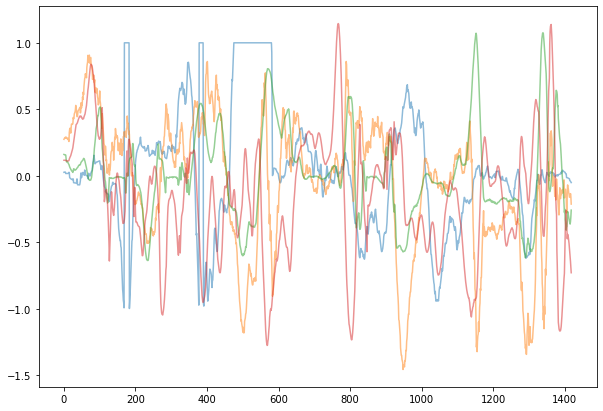

In [ ]:
smoothSteer = Smooth(df.steer, size=10)
smoothSteer[np.abs(smoothSteer) > 0.02] = 0.02
plt.figure(figsize=(10,7))
plt.plot(smoothSteer*50, alpha=0.5)

smoothL = Smooth(df.curvatL, size=10)
plt.plot(smoothL/2, alpha=0.5)

smoothR = Smooth(df.curvatR, size=10)
plt.plot(smoothR/4, alpha=0.5)

smoothD = Smooth(df.deviation, size=10)
plt.plot(smoothD-1, alpha=0.5)
plt.show()

In [ ]:
df.corr()

,steer,speed,throttle,brake,curvatL,curvatR,deviation
steer,1.000000,-0.486848,-0.087129,0.286331,-0.060839,-0.030831,0.006555
speed,-0.486848,1.000000,0.254594,-0.388850,0.039487,0.061363,0.044795
throttle,-0.087129,0.254594,1.000000,-0.183401,-0.071611,0.028415,-0.002720
brake,0.286331,-0.388850,-0.183401,1.000000,0.045214,0.136376,-0.139326
curvatL,-0.060839,0.039487,-0.071611,0.045214,1.000000,0.207699,0.096931
curvatR,-0.030831,0.061363,0.028415,0.136376,0.207699,1.000000,-0.249361
deviation,0.006555,0.044795,-0.002720,-0.139326,0.096931,-0.249361,1.000000


In [ ]:
df.steer.mean()

0.0077676793016378445

In [ ]:
x = np.arange(0, 3.14, 0.1)
sinx = np.sin(x)
cosx = np.cos(x)
table = np.array([sinx, cosx]).T
df_ex = pd.DataFrame(table)

In [ ]:
df_ex.corr()

,0,1
0,1.000000,-0.037602
1,-0.037602,1.000000


In [ ]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [ ]:
dataX = Input(shape=(6,))
hidden = Dense(128, activation='relu')(dataX)
hidden = Dense(256, activation='relu')(hidden)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(128, activation='relu')(hidden)
output = Dense(1, activation='tanh')(hidden)*3

model = Model(inputs=dataX, outputs=output)
optimizer = K.optimizers.Adam()
model.compile(optimizer, loss='MSE', metrics=K.metrics.RootMeanSquaredError())

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
_________________________________________________________________
tf_op_layer_Mul (TensorFlowO [(None, 1)]              

In [ ]:
YX = df.values
for i in range(7):
    YX[:,i] = Smooth(YX[:,i], size=10)
    mean = np.mean(YX[:,i])
    std = np.std(YX[:,i])

    YX[:,i] -= mean
    YX[:,i] /= std
    YX[:,i][YX[:,i] < -2] = -2
    YX[:,i][YX[:,i] > 2] = 2

Y = YX[:,0]
X = YX[:,1:]

In [ ]:
#shuffle = np.arange(len(Y))
#np.random.shuffle(shuffle)
trLog = model.fit(x=X[:], y=Y[:], epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 0s 9ms/step - loss: 0.1341 - root_mean_squared_error: 0.3662 - val_loss: 0.0723 - val_root_mean_squared_error: 0.2689
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0633 - root_mean_squared_error: 0.2517 - val_loss: 0.0510 - val_root_mean_squared_error: 0.2258
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0438 - root_mean_squared_error: 0.2093 - val_loss: 0.0465 - val_root_mean_squared_error: 0.2157
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0269 - root_mean_squared_error: 0.1640 - val_loss: 0.0464 - val_root_mean_squared_error: 0.2155
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0488 - val_root_mean_squared_error: 0.2210
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0524 - val_root_m

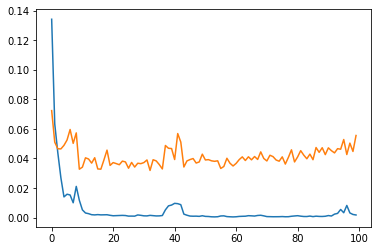

In [ ]:
plt.plot(trLog.history['loss'], label='train')
plt.plot(trLog.history['val_loss'], label= 'validation')

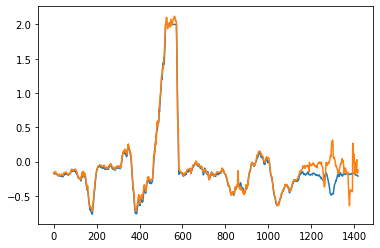

In [ ]:
pred = model(X)
pred = np.array(pred).reshape(-1)
plt.plot(Y)
plt.plot(pred)

In [ ]:
FindLane('ATS_data2',range(1290,1310), show=True)

In [ ]:
YX = df.values
for i in range(7):
    YX[:,i] = Smooth(YX[:,i], size=5)
    mean = np.mean(YX[:,i])
    std = np.std(YX[:,i])

    YX[:,i] -= mean
    YX[:,i] /= std
    YX[:,i][YX[:,i] < -2] = -2
    YX[:,i][YX[:,i] > 2] = 2

Y = YX[:,0]
X = YX[:,1:]

window = 10
winX = np.zeros((len(Y), 6*window))
for i in range(window):
    winX[:,i*6:(i+1)*6] = np.roll(X, i, axis=0)

In [ ]:
dataX = Input(shape=(6*window,))
hidden = Dense(128, activation='relu')(dataX)
hidden = Dense(256, activation='relu')(hidden)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(128, activation='relu')(hidden)
output = Dense(1, activation='tanh')(hidden)*2

winModel = Model(inputs=dataX, outputs=output)
optimizer = K.optimizers.Adam()
winModel.compile(optimizer, loss='MSE', metrics=K.metrics.RootMeanSquaredError())

In [ ]:
winLog = winModel.fit(x=winX, y=Y, epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 0s 8ms/step - loss: 0.3862 - root_mean_squared_error: 0.6214 - val_loss: 0.1372 - val_root_mean_squared_error: 0.3704
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1406 - root_mean_squared_error: 0.3750 - val_loss: 0.2047 - val_root_mean_squared_error: 0.4525
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0776 - root_mean_squared_error: 0.2786 - val_loss: 0.1662 - val_root_mean_squared_error: 0.4076
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0300 - root_mean_squared_error: 0.1731 - val_loss: 0.1404 - val_root_mean_squared_error: 0.3747
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.1382 - val_root_mean_squared_error: 0.3718
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0084 - root_mean_squared_error: 0.0918 - val_loss: 0.1233 - val_root_m

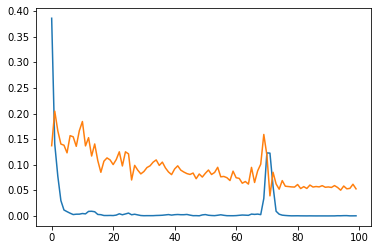

In [ ]:
plt.plot(winLog.history['loss'], label='train')
plt.plot(winLog.history['val_loss'], label= 'validation')

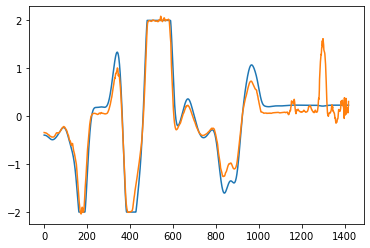

In [ ]:
winPred = winModel(winX)
winPred = np.array(pred).reshape(-1)
plt.plot(Y)
plt.plot(winPred)

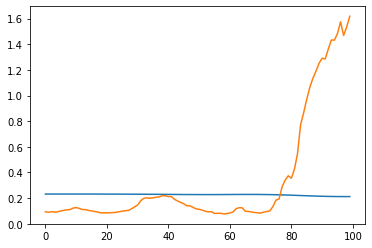

In [ ]:
plt.plot(Y[1200:1300])
plt.plot(winPred[1200:1300])

In [ ]:
 FindLane('ATS_data2', range(800,850, 1), show=True)

Output hidden; open in https://colab.research.google.com to view.